In [87]:
import os, os.path
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import numpy as np
import pandas as pd
import cv2

In [88]:
def color(image):
    color_map = {0: np.array([0, 0, 0]),
             1: np.array([128, 0, 0]),
             2: np.array([0, 255, 36]),
             3: np.array([148, 148, 148]),
             4: np.array([255, 255, 255]),
             5: np.array([34, 97, 38]),
             6: np.array([0, 69, 255]),
             7: np.array([75, 181, 73]),
             8: np.array([222, 31, 7]),}
    
    data_3d = np.ndarray(shape=(image.shape[0], image.shape[1], 3), dtype=int)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            data_3d[i][j] = color_map[image[i][j]]
    return data_3d

In [89]:
root_path="../data/"

In [90]:
folders=[folder for folder in os.listdir(root_path) if os.path.isdir(os.path.join(root_path,folder))]
len(folders)

97

In [91]:
paths=[os.path.join(root_path,folder) for folder in folders]
path_images=[path+"/images/" for path in paths]

full_images=[]
for path in path_images:
    for file in os.listdir(path):
        full_images.append(os.path.join(path,file))

path_labels=[path+"/labels/" for path in paths]

full_labels=[]
for path in path_labels:
    for file in os.listdir(path):
        full_labels.append(os.path.join(path,file))

name_images=[os.listdir(image_name_path) for image_name_path in path_images]
name_labels=[os.listdir(label_name_path) for label_name_path in path_labels]

In [92]:
#image_with_label=[name_image for name_image in name_images if name_image in name_labels]
#image_with_label
images_names=[]
for i in range(len(name_images)):
    for l in name_images[i]:
        images_names.append(l)

labels_names=[]
for i in range(len(name_labels)):
    for l in name_labels[i]:
        labels_names.append(l)

In [93]:
len(images_names) #total images

3838

In [94]:
len(labels_names) #total labels

3500

In [95]:
image_w_label=[name for name in images_names if name in labels_names]
len(image_w_label) #images with labels

2687

In [96]:
X_raw=[x for x in full_images if os.path.basename(x) in image_w_label]
y_raw=[y for y in full_labels if os.path.basename(y) in image_w_label]

In [97]:
X_images=[mpimg.imread(image) for image in X_raw]
y_labels=[mpimg.imread(label) for label in y_raw]

#images=[cv2.resize(mpimg.imread(image), (256,256)) for image in X_raw].copy()
#labels=[cv2.resize(mpimg.imread(label), (256,256), interpolation =cv2.INTER_NEAREST) for label in y_raw].copy()

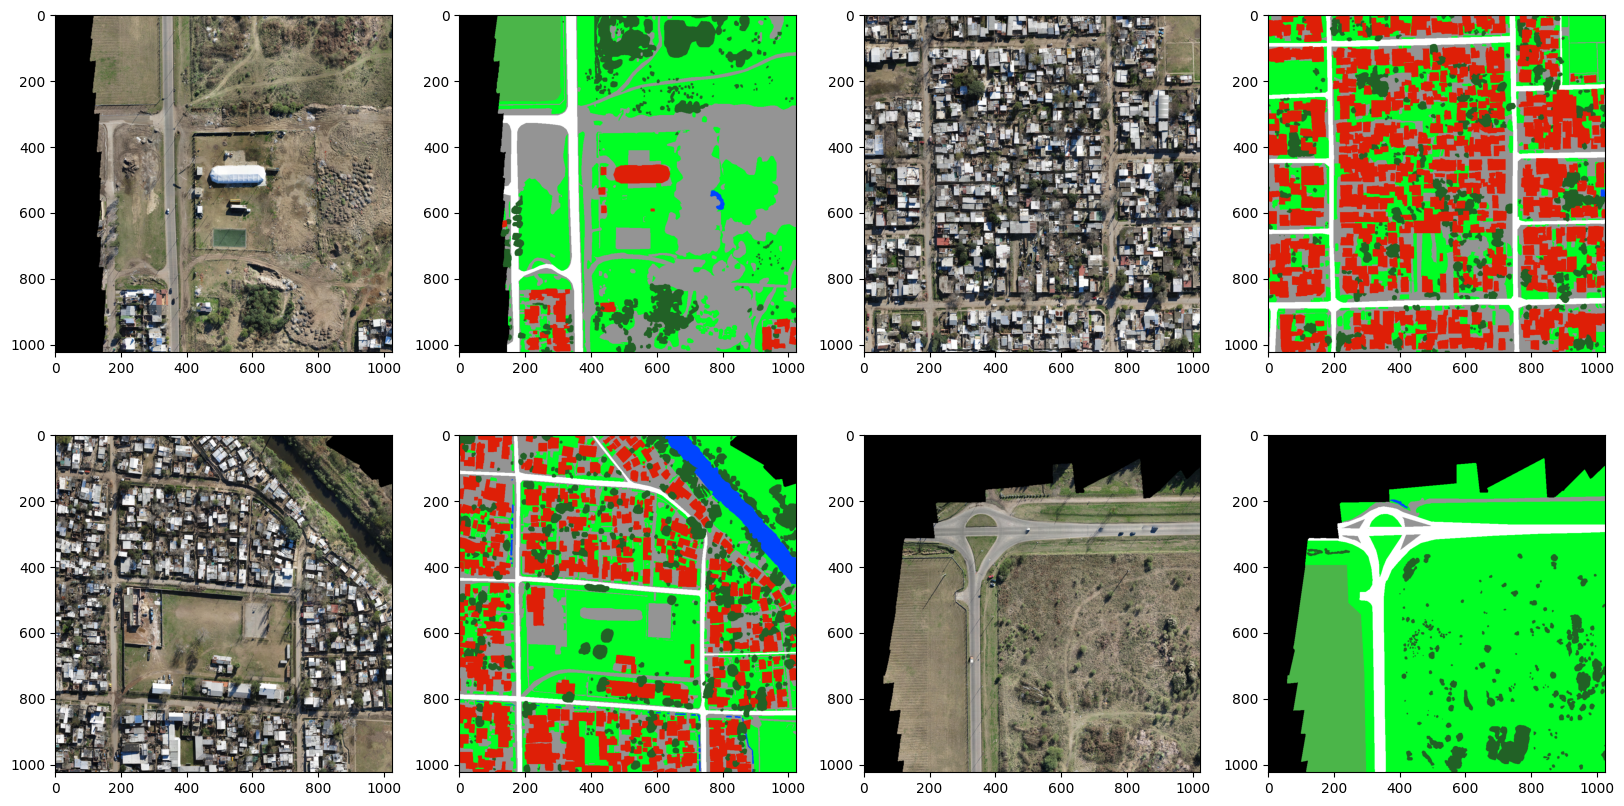

In [98]:
plt.figure(figsize=(20,10))
for i in range(4):
    plt.subplot(2,4,2*i+1)
    plt.imshow(X_images[i])
for i in range(4):
    plt.subplot(2,4,2*i+2)
    plt.imshow(color(y_labels[i]));

In [99]:
length=[image.shape[0] for image in X_images]
width=[image.shape[1] for image in y_labels]

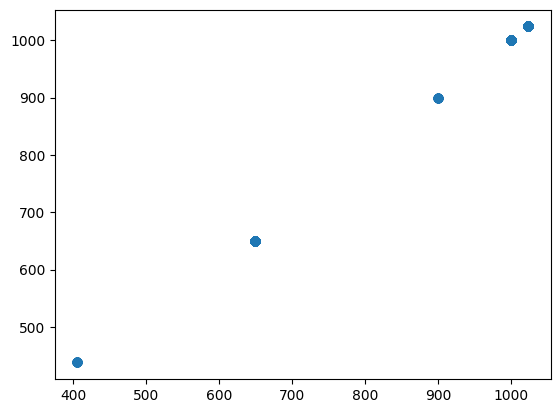

In [100]:
plt.scatter(length,width);

In [101]:
for i in y_labels:
    if i.shape[0]<500:
        small=i
        break
y_labels.index(small)

/tmp/ipykernel_7161/4178598557.py:5: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  y_labels.index(small)


419

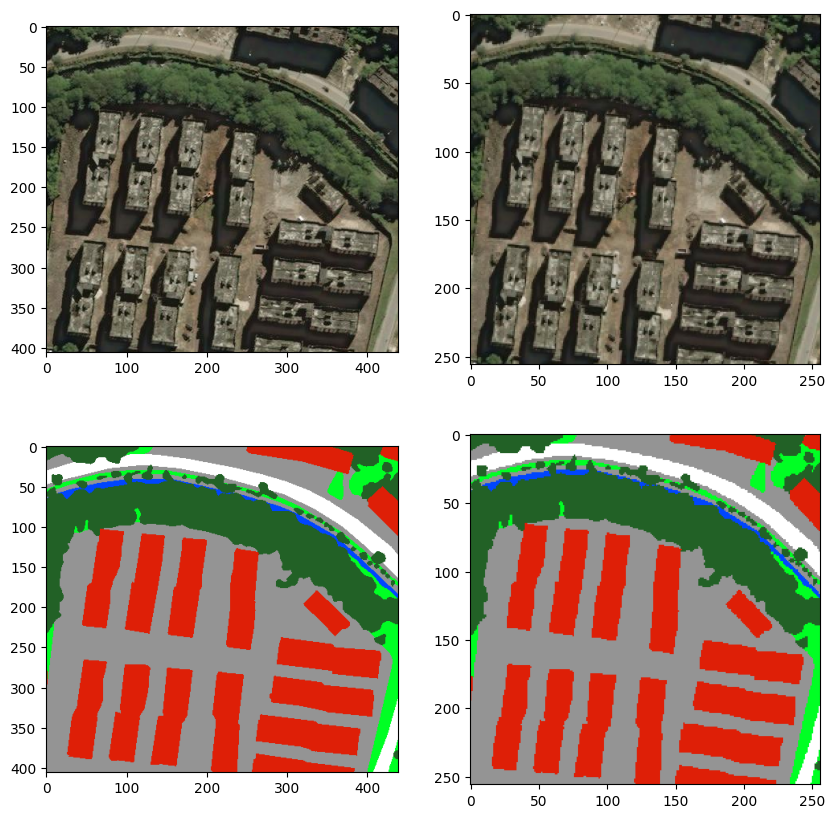

In [102]:
#check quality of resolution change
X_resized = cv2.resize(X_images[419], (256,256))
y_resized = cv2.resize(y_labels[419], (256,256), interpolation =cv2.INTER_NEAREST)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(X_images[419])
plt.subplot(2,2,2)
plt.imshow(X_resized)
plt.subplot(2,2,3)
plt.imshow(color(y_labels[419]))
plt.subplot(2,2,4)
plt.imshow(color(y_resized));

In [120]:
unique, counts = np.unique(y_labels[419], return_counts=True)
counts_or = {k: v for k, v in zip(unique, counts)}
counts_or

{2: 7236, 3: 75574, 4: 8472, 5: 34290, 6: 1896, 8: 50766}

In [122]:
np.sum(list(count_or.values()))

178234.0

In [121]:
unique, counts = np.unique(y_resized, return_counts=True)
count_res = {k: v for k, v in zip(unique, counts)}
count_res

{2: 2640, 3: 27788, 4: 3101, 5: 12666, 6: 707, 8: 18634}

In [123]:
np.sum(list(count_res.values()))

65536

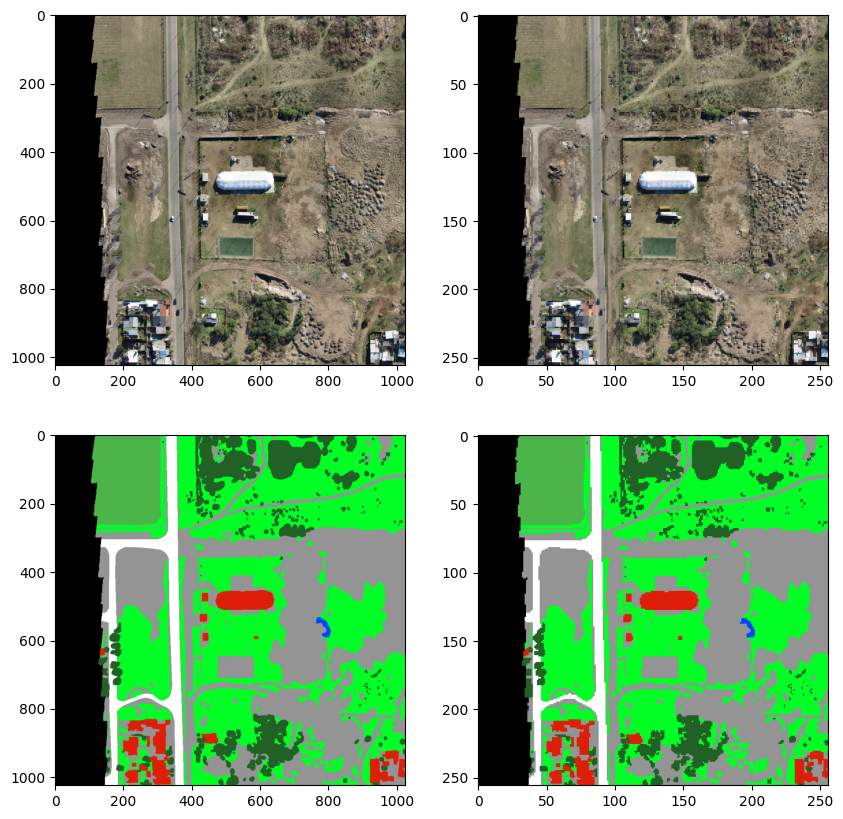

In [124]:
#check quality of resolution change
X_resized = cv2.resize(X_images[0], (256,256))
y_resized = cv2.resize(y_labels[0], (256,256), interpolation =cv2.INTER_NEAREST)
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.imshow(X_images[0])
plt.subplot(2,2,2)
plt.imshow(X_resized)
plt.subplot(2,2,3)
plt.imshow(color(y_labels[0]))
plt.subplot(2,2,4)
plt.imshow(color(y_resized));

In [125]:
counted=[]
for i in range(len(labels)):
    unique, counts = np.unique(labels[i], return_counts=True)
    count={k: v for k, v in zip(unique, counts)}
    counted.append(count)
counted[0]

{0: 8582, 2: 22959, 3: 20457, 4: 3073, 5: 5344, 6: 66, 7: 3185, 8: 1870}

In [126]:
len(counted)

2687

In [127]:
sum_unbalanced=[]
for i in range(len(counted)):
    sum=counted[i].get(1,0)+counted[i].get(4,0)+counted[i].get(6,0)
    sum_unbalanced.append(sum)

index_unbalanced=[]
for i in sum_unbalanced:
    if i<1000:
        index_unbalanced.append(sum_unbalanced.index(i))
len(index_unbalanced)

283